<a href="https://colab.research.google.com/github/Sejalakkaldev/HDS5210_InClassSejal/blob/master/Final/final_project_sejal_HDS_5210_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comprehensive Analysis of Cancer Patient Data: Exploring Protein Levels, Tumor Stages, and Treatment Outcomes**

**Introduction**

This project aims to explore diverse datasets to uncover patterns, correlations, and insights that can inform decision-making in health-related domains.

The analysis integrates datasets on cancer statistics, patient demographics, and other community health indicators.

The scope extends beyond numerical assessments, delving into the broader implications of observed patterns on healthcare policies and practices.

By employing statistical analysis and visualization techniques, this project investigates relationships between variables and identifies key trends. With the integration of tools like Jupyter Notebook for Python-based analysis, this project ensures transparency, reproducibility, and clarity in its approach.

# Data Access and Formats

In [227]:
# Importing necessary libraires

import pandas as pd
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset 1 Introduction**

The cancer dataset combines molecular and clinical data, offering a robust resource for oncology research. It includes quantitative measurements of four proteins (Protein1, Protein2, Protein3, and Protein4), which may serve as biomarkers for cancer progression or treatment response.

Its structured mix of numerical and categorical data makes it ideal for machine learning projects like classification or clustering, while its translational potential bridges molecular biology and clinical oncology.



In [228]:
# Getting Data from local file

cancer_df = pd.read_csv("/content/cancer.csv")

In [229]:
cancer_df.head()

,Patient_ID,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology
0,TCGA-D8-A1XD,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma
1,TCGA-EW-A1OX,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma
2,TCGA-A8-A079,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma
3,TCGA-D8-A1XR,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma
4,TCGA-BH-A0BF,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma


In [230]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Patient_ID    334 non-null    object 
 1   Protein1      334 non-null    float64
 2   Protein2      334 non-null    float64
 3   Protein3      334 non-null    float64
 4   Protein4      334 non-null    float64
 5   Tumour_Stage  334 non-null    object 
 6   Histology     334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.4+ KB


**Dataset 2 Introduction**

This dataset enables diverse analytical applications, from biomarker discovery and cancer staging to evaluating treatment efficacy and survival analysis.

Additionally, treatment details include surgery types (e.g., lumpectomy, modified radical mastectomy), hormonal receptor statuses (ER, PR, HER2), and patient outcomes (Alive or Dead), with timelines captured through surgery and follow-up dates.

In [231]:
# Getting data from internet

url = "https://www.dropbox.com/scl/fi/6rgb09cvizs6dini7ygie/treatment.xlsx?rlkey=gytn8miwu9mdphhzatoo8uhhl&st=p9txd5j9&dl=1"
response = requests.get(url)
excel_data = BytesIO(response.content)
treatment_df = pd.read_excel(excel_data)


In [232]:
treatment_df.head()

,Patient_ID,Surgery_type,ER status,PR status,HER2 status,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,Modified Radical Mastectomy,Positive,Positive,Negative,2017-01-15,2017-06-19,Alive
1,TCGA-EW-A1OX,Lumpectomy,Positive,Positive,Negative,2017-04-26,2018-11-09,Dead
2,TCGA-A8-A079,Other,Positive,Positive,Negative,2017-09-08,2018-06-09,Alive
3,TCGA-D8-A1XR,Modified Radical Mastectomy,Positive,Positive,Negative,2017-01-25,2017-07-12,Alive
4,TCGA-BH-A0BF,Other,Positive,Positive,Negative,2017-05-06,2019-06-27,Dead


In [233]:
treatment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Patient_ID          334 non-null    object        
 1   Surgery_type        334 non-null    object        
 2   ER status           334 non-null    object        
 3   PR status           334 non-null    object        
 4   HER2 status         334 non-null    object        
 5   Date_of_Surgery     334 non-null    datetime64[ns]
 6   Date_of_Last_Visit  317 non-null    datetime64[ns]
 7   Patient_Status      321 non-null    object        
dtypes: datetime64[ns](2), object(6)
memory usage: 21.0+ KB


**Dataset 3 Introduction**

This project delves into multiple datasets, each providing a unique lens on public health. By leveraging statistical techniques and data visualizations, it highlights trends in patient characteristics, the prevalence of various blood types, age distributions, and potential correlations between these factors.

The analysis aims to uncover patterns that can inform healthcare decisions and improve outcomes for diverse populations.

In [234]:
# Use of JSON data

df = pd.read_json('/content/Patient_details.json')
p_df = pd.json_normalize(df['l'])

In [235]:
print(p_df.head())

     Patient_ID  Age  Gender Blood Type
0  TCGA-D8-A1XD   36  FEMALE         B-
1  TCGA-EW-A1OX   43  FEMALE         A+
2  TCGA-A8-A079   69  FEMALE         A-
3  TCGA-D8-A1XR   56  FEMALE         O+
4  TCGA-BH-A0BF   56  FEMALE        AB+


In [236]:
p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Patient_ID  334 non-null    object
 1   Age         334 non-null    int64 
 2   Gender      334 non-null    object
 3   Blood Type  334 non-null    object
dtypes: int64(1), object(3)
memory usage: 10.6+ KB


# Data Merging

In [237]:
# Merging 1

def merge_cancer_treatment_data(cancer_df, treatment_df):

    """
    Joins the cancer data with treatment data based on the Patient_ID.

    Arguments:
    cancer_df: DataFrame containing cancer-related data.
    treatment_df: DataFrame containing treatment-related data.

    Returns:
    Merged DataFrame containing both cancer and treatment data.
    """

    try:

        merged_df = pd.merge(cancer_df, treatment_df, on='Patient_ID', how='inner')
        print("Test passed: Cancer and Treatment data merged successfully.")

        return merged_df

    except Exception as e:
        print(f"Test failed: {e}")

# Apply the first merge
merged_cancer_treatment_df = merge_cancer_treatment_data(cancer_df, treatment_df)
print("\nMerged Cancer and Treatment Data:")
merged_cancer_treatment_df.head()


Test passed: Cancer and Treatment data merged successfully.

Merged Cancer and Treatment Data:


,Patient_ID,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,Surgery_type,ER status,PR status,HER2 status,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Modified Radical Mastectomy,Positive,Positive,Negative,2017-01-15,2017-06-19,Alive
1,TCGA-EW-A1OX,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Lumpectomy,Positive,Positive,Negative,2017-04-26,2018-11-09,Dead
2,TCGA-A8-A079,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Other,Positive,Positive,Negative,2017-09-08,2018-06-09,Alive
3,TCGA-D8-A1XR,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Modified Radical Mastectomy,Positive,Positive,Negative,2017-01-25,2017-07-12,Alive
4,TCGA-BH-A0BF,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Other,Positive,Positive,Negative,2017-05-06,2019-06-27,Dead


This step involves merging the **cancer dataset** with the **treatment dataset** based on the common key `Patient_ID`. The `merge_cancer_treatment_data` function integrates patient-level cancer-related data with corresponding treatment details.

By combining these datasets, the resulting DataFrame provides a comprehensive view of both cancer characteristics (e.g., tumor stage, protein levels) and treatment attributes (e.g., surgery type, hormone receptor status). This merged dataset facilitates analyses such as understanding the relationship between tumor features and treatment choices or evaluating treatment effectiveness across different patient profiles.

In [238]:
# Merging 2

def merge_with_demographic_data(merged_cancer_treatment_df, p_df):

    """
    Joins the merged cancer and treatment data with patient data based on Patient_ID.

    Arguments:
    merged_cancer_treatment_df: DataFrame containing cancer and treatment data.
    p_df: DataFrame containing patient details .

    Returns:
    Final merged DataFrame containing cancer, treatment, and patient data.
    """

    try:

        final_merged_df = pd.merge(merged_cancer_treatment_df, p_df, on='Patient_ID', how='inner')
        print("test passed: Merged data combined with patient data successfully.")
        return final_merged_df

    except Exception as e:
        print(f"Test failed: {e}")

# Apply the second merge
final_merged_df = merge_with_demographic_data(merged_cancer_treatment_df, p_df)
print("\nFinal Merged Data (Cancer, Treatment, and patient):")
final_merged_df.head()

test passed: Merged data combined with patient data successfully.

Final Merged Data (Cancer, Treatment, and patient):


,Patient_ID,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,Surgery_type,ER status,PR status,HER2 status,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Age,Gender,Blood Type
0,TCGA-D8-A1XD,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Modified Radical Mastectomy,Positive,Positive,Negative,2017-01-15,2017-06-19,Alive,36,FEMALE,B-
1,TCGA-EW-A1OX,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Lumpectomy,Positive,Positive,Negative,2017-04-26,2018-11-09,Dead,43,FEMALE,A+
2,TCGA-A8-A079,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Other,Positive,Positive,Negative,2017-09-08,2018-06-09,Alive,69,FEMALE,A-
3,TCGA-D8-A1XR,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Modified Radical Mastectomy,Positive,Positive,Negative,2017-01-25,2017-07-12,Alive,56,FEMALE,O+
4,TCGA-BH-A0BF,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Other,Positive,Positive,Negative,2017-05-06,2019-06-27,Dead,56,FEMALE,AB+


This step merges the **combined cancer and treatment dataset** with the **demographic dataset** using the common key `Patient_ID`. The `merge_with_demographic_data` function integrates detailed patient demographics, such as age, gender, and blood type, into the already merged cancer and treatment data.

The resulting **final merged dataset** provides a holistic view of each patient's profile, including cancer attributes, treatment details, and demographic factors. This comprehensive dataset enables more in-depth analyses, such as exploring the interplay between demographics, tumor characteristics, and treatment outcomes, or identifying demographic trends in treatment choices and success rates.

# Data Aggregation and Pivoting

**Aggregation 1**

In [239]:
# Aggregation 1

def aggregate_proteins_by_tumor_stage(df):

    """
    Aggregates the average levels of Protein1, Protein2, Protein3, and Protein4 for each tumor stage.

    Arguments:
    df: Final merged DataFrame containing cancer, treatment, and demographic data.

    Returns:
    DataFrame with tumor stage and average protein levels.
    """

    try:
        protein_agg = df.groupby('Tumour_Stage')[['Protein1', 'Protein2', 'Protein3', 'Protein4']].mean().reset_index()
        print("test passed: Average protein levels by tumor stage calculated successfully.")

        return protein_agg

    except Exception as e:
        print(f"Test failed: {e}")

# Apply aggregation 1
protein_by_tumor_stage = aggregate_proteins_by_tumor_stage(final_merged_df)

print("\nAverage Protein Levels by Tumor Stage:")
print(protein_by_tumor_stage)

test passed: Average protein levels by tumor stage calculated successfully.

Average Protein Levels by Tumor Stage:
  Tumour_Stage  Protein1  Protein2  Protein3  Protein4
0            I -0.014430  1.001318 -0.165147  0.037828
1           II -0.007734  0.964763 -0.065409  0.018023
2          III -0.094220  0.862207 -0.088845 -0.031453


This step involves aggregating the **average levels of proteins** (`Protein1`, `Protein2`, `Protein3`, `Protein4`) for each **tumor stage**. The `aggregate_proteins_by_tumor_stage` function calculates the mean protein levels grouped by `Tumour_Stage`, providing insights into how protein expressions vary across different stages of cancer.

This aggregation is crucial for understanding the biological patterns associated with tumor progression. For example, elevated or suppressed protein levels in specific stages might indicate their role in cancer development or progression. Such insights can guide further research and potential biomarker identification for diagnosis or treatment strategies tailored to tumor stage.

**Aggregation 2**

In [240]:
# Aggregation 2

def aggregate_patients_by_histology_status(df):

    """
    Aggregates the count of patients for each histology type and their survival status (Alive/Dead).

    Arguments:
    df: Final merged DataFrame containing cancer, treatment, and demographic data.

    Returns:
    DataFrame with histology type, patient status, and count of patients.
    """

    try:

        histology_agg = df.groupby(['Histology', 'Patient_Status']).size().reset_index(name='Patient_Count')
        print("Test passed: Patient counts by histology type and survival status calculated successfully.")

        return histology_agg

    except Exception as e:
        print(f"Test failed: {e}")

# Apply aggregation 2
patients_by_histology_status = aggregate_patients_by_histology_status(final_merged_df)

print("\nPatient Count by Histology and Status:")
print(patients_by_histology_status)

Test passed: Patient counts by histology type and survival status calculated successfully.

Patient Count by Histology and Status:
                        Histology Patient_Status  Patient_Count
0   Infiltrating Ductal Carcinoma          Alive            179
1   Infiltrating Ductal Carcinoma           Dead             47
2  Infiltrating Lobular Carcinoma          Alive             67
3  Infiltrating Lobular Carcinoma           Dead             16
4              Mucinous Carcinoma          Alive              9
5              Mucinous Carcinoma           Dead              3


This step aggregates the **count of patients** for each histology type (e.g., Infiltrating Ductal Carcinoma, Mucinous Carcinoma) and their **survival status** (Alive/Dead). The `aggregate_patients_by_histology_status` function groups the data by `Histology` and `Patient_Status`, then counts the number of patients in each group.

This aggregation provides valuable insights into how different histology types are associated with patient outcomes. For example, it can reveal which cancer histology types have higher survival rates, guiding further research into treatment effectiveness or the aggressiveness of specific cancer subtypes. These patterns can also inform clinical decisions and resource allocation.

**Pivoting 1**

In [241]:
# Pivoting 1

def pivot_protein_by_tumor_stage(df):

    """
    Pivots the average protein levels for each tumor stage to create a structured view.

    Arguments:
    df: DataFrame resulting from aggregation of proteins by tumor stage.

    Returns:
    Pivoted DataFrame with proteins as columns and tumor stages as rows.
    """

    try:

        pivoted_proteins = df.pivot_table(values=['Protein1', 'Protein2', 'Protein3', 'Protein4'],
                                          index='Tumour_Stage',
                                          aggfunc='mean')
        print("Test passed: Average protein levels by tumor stage pivoted successfully.")

        return pivoted_proteins

    except Exception as e:
        print(f"Test failed: {e}")

# Apply pivoting 1
pivoted_proteins_by_tumor_stage = pivot_protein_by_tumor_stage(protein_by_tumor_stage)

print("\nPivoted Protein Levels by Tumor Stage:")
print(pivoted_proteins_by_tumor_stage)

Test passed: Average protein levels by tumor stage pivoted successfully.

Pivoted Protein Levels by Tumor Stage:
              Protein1  Protein2  Protein3  Protein4
Tumour_Stage                                        
I            -0.014430  1.001318 -0.165147  0.037828
II           -0.007734  0.964763 -0.065409  0.018023
III          -0.094220  0.862207 -0.088845 -0.031453


This step involves pivoting the **average protein levels** (`Protein1`, `Protein2`, `Protein3`, `Protein4`) for each **tumor stage** to create a structured and easy-to-read table. The `pivot_protein_by_tumor_stage` function organizes the data with tumor stages as rows and protein levels as columns.

The resulting pivot table provides a clear comparison of protein expressions across different tumor stages, allowing for quick identification of trends or abnormalities in protein levels as cancer progresses. This structured format is particularly useful for visualizing and interpreting how proteins correlate with tumor stage, which could have implications for cancer diagnostics and targeted therapies.

**Pivoting 2**

In [242]:
# Pivoting 2

def pivot_patient_count_by_gender_surgery(df):

    """
    Pivots the count of patients for each gender by their surgery type.

    Arguments:
    df: Final merged DataFrame containing cancer, treatment, and demographic data.

    Returns:
    Pivoted DataFrame with surgery types as columns and genders as rows.
    """

    try:

        pivoted_gender_surgery = df.pivot_table(values='Patient_ID',
                                                index='Gender',
                                                columns='Surgery_type',
                                                aggfunc='count',
                                                fill_value=0)
        print("Test passed: Patient count by gender and surgery type pivoted successfully.")

        return pivoted_gender_surgery

    except Exception as e:
        print(f"Test failed: {e}")

# Apply pivoting 2
pivoted_gender_surgery = pivot_patient_count_by_gender_surgery(final_merged_df)

print("\nPivoted Patient Count by Gender and Surgery Type:")
print(pivoted_gender_surgery)

Test passed: Patient count by gender and surgery type pivoted successfully.

Pivoted Patient Count by Gender and Surgery Type:
Surgery_type  Lumpectomy  Modified Radical Mastectomy  Other  \
Gender                                                         
FEMALE                66                           94    104   
MALE                   0                            2      1   

Surgery_type  Simple Mastectomy  
Gender                           
FEMALE                       66  
MALE                          1  


This step pivots the **count of patients** for each **gender** (`Male`, `Female`) across different **surgery types** (e.g., Lumpectomy, Radical Mastectomy). The `pivot_patient_count_by_gender_surgery` function organizes the data into a table with genders as rows and surgery types as columns.

The resulting pivot table allows for a clear comparison of surgery preferences or distributions between male and female patients. It highlights trends such as whether certain surgery types are more commonly performed on one gender, providing insights into treatment strategies or demographic-specific patterns in cancer care. This structured format aids in understanding gender-based differences in surgical interventions.

# Data Transformation

**Data Transformation 1**

In [243]:
# Transformation 1

def normalize_protein_levels(df):

    """
    Normalizes the values of Protein1, Protein2, Protein3, and Protein4 to a range of 0 to 1.
    """

    try:

        protein_cols = ['Protein1', 'Protein2', 'Protein3', 'Protein4']

        for col in protein_cols:

            min_val = df[col].min()
            max_val = df[col].max()
            df[col + '_Normalized'] = (df[col] - min_val) / (max_val - min_val)

        print("Test passed: Protein levels normalized successfully.")

        return df

    except Exception as e:
        print(f"Test failed: {e}")

# Apply the first transformation
final_merged_df = normalize_protein_levels(final_merged_df)

print("\nAfter Transformation 1 - Normalized Protein Levels:")
print(final_merged_df[['Protein1_Normalized', 'Protein2_Normalized', 'Protein3_Normalized', 'Protein4_Normalized']].head())


Test passed: Protein levels normalized successfully.

After Transformation 1 - Normalized Protein Levels:
   Protein1_Normalized  Protein2_Normalized  Protein3_Normalized  \
0             0.615390             0.320733             0.569135   
1             0.488138             0.355358             0.586754   
2             0.649353             0.522750             0.340225   
3             0.682676             0.175136             0.375408   
4             0.651277             0.658657             0.562147   

   Protein4_Normalized  
0             0.628982  
1             0.545493  
2             0.490026  
3             0.588108  
4             0.468761  


This transformation normalizes the values of **Protein1**, **Protein2**, **Protein3**, and **Protein4** to a range between **0 and 1**, creating new columns for the normalized values (e.g., `Protein1_Normalized`). The normalization formula scales each value relative to the minimum and maximum values within the respective column.

By normalizing the protein levels, this transformation ensures that the values are on a consistent scale, which is essential for comparative analysis and machine learning algorithms. It reduces the impact of differences in magnitude between proteins and helps in identifying relative trends or patterns across tumor stages, treatments, or patient demographics.

**Data Transformation 2**

In [244]:
# Transformation 2

def convert_tumor_stage_to_numeric(df):

    """
    Converts Tumour_Stage (e.g., II, III) to ordered numeric values (e.g., 2, 3).
    """

    try:

        stage_mapping = {'I': 1,'II': 2, 'III': 3}

        df['Tumour_Stage_Numeric'] = df['Tumour_Stage'].map(stage_mapping)

        print("Test passed: Tumor stage converted to numeric categories successfully.")

        return df

    except Exception as e:
        print(f"Test failed: {e}")

# Apply the second transformation
final_merged_df = convert_tumor_stage_to_numeric(final_merged_df)

print("\nAfter Transformation 2 - Numeric Tumor Stage:")
final_merged_df[['Tumour_Stage', 'Tumour_Stage_Numeric']].head()

Test passed: Tumor stage converted to numeric categories successfully.

After Transformation 2 - Numeric Tumor Stage:


,Tumour_Stage,Tumour_Stage_Numeric
0,III,3
1,II,2
2,III,3
3,II,2
4,II,2


This transformation converts the **Tumour_Stage** categorical values (e.g., **I**, **II**, **III**) into **ordered numeric values** (e.g., 1, 2, 3) using a mapping dictionary. The new column, `Tumour_Stage_Numeric`, represents the tumor stages in a format suitable for numerical analysis.

This transformation simplifies comparisons and statistical analyses involving tumor stages, as numeric data is easier to process for tasks such as correlation analysis, regression modeling, or visualizations. By standardizing tumor stage values into a numerical format, it enhances the dataset's usability for advanced analyses and machine learning applications.

**Data Transformation 3**

In [245]:
# Transformation 3

def extract_surgery_years(df):

    """
    Extracts the year from Date_of_Surgery and Date_of_Last_Visit columns.
    """

    try:

        df['Surgery_Year'] = df['Date_of_Surgery'].dt.year
        df['Last_Visit_Year'] = df['Date_of_Last_Visit'].dt.year

        print("Test passed: Surgery and last visit years extracted successfully.")

        return df

    except Exception as e:
        print(f"Test failed: {e}")

# Apply the third transformation
final_merged_df = extract_surgery_years(final_merged_df)

print("\nAfter Transformation 3 - Extracted Surgery Years:")
final_merged_df[['Date_of_Surgery', 'Surgery_Year', 'Date_of_Last_Visit', 'Last_Visit_Year']].head()


Test passed: Surgery and last visit years extracted successfully.

After Transformation 3 - Extracted Surgery Years:


,Date_of_Surgery,Surgery_Year,Date_of_Last_Visit,Last_Visit_Year
0,2017-01-15,2017,2017-06-19,2017.0
1,2017-04-26,2017,2018-11-09,2018.0
2,2017-09-08,2017,2018-06-09,2018.0
3,2017-01-25,2017,2017-07-12,2017.0
4,2017-05-06,2017,2019-06-27,2019.0


This transformation extracts the **year** from the `Date_of_Surgery` and `Date_of_Last_Visit` columns, creating two new columns: **'Surgery_Year'** and **'Last_Visit_Year'**. The `dt.year` method is used to isolate the year component from the datetime columns.

By extracting the years, this transformation enables time-based analyses, such as identifying trends in surgery frequencies or follow-up visits over the years. It simplifies temporal comparisons, such as understanding changes in treatment outcomes or patient follow-up behaviors over time. This addition is particularly useful for longitudinal studies and generating insights based on year-specific data.

**Data Transformation 4**

In [246]:
# Transformation 4

def standardize_gender_column(df):

    """
    Standardizes the 'Gender' column by converting all values to title case.
    """

    try:

        df['Gender'] = df['Gender'].str.capitalize()

        print("Test passed: Gender column standardized successfully.")

        return df

    except Exception as e:
        print(f"Test failed: {e}")

# Apply the fourth transformation
final_merged_df = standardize_gender_column(final_merged_df)

print("\nAfter Transformation 4 - Standardized Gender Column:")
final_merged_df[['Patient_ID', 'Gender']].head()

Test passed: Gender column standardized successfully.

After Transformation 4 - Standardized Gender Column:


,Patient_ID,Gender
0,TCGA-D8-A1XD,Female
1,TCGA-EW-A1OX,Female
2,TCGA-A8-A079,Female
3,TCGA-D8-A1XR,Female
4,TCGA-BH-A0BF,Female


This transformation standardizes the **'Gender'** column by converting all values to title case, ensuring consistency in formatting (e.g., "FEMALE" becomes "Female" and "male" becomes "Male"). This is achieved using the `str.capitalize()` method.

By ensuring a consistent format in the `Gender` column, this transformation improves data quality and usability, making it easier to group, filter, or analyze gender-based trends. It eliminates discrepancies caused by variations in capitalization, enhancing the dataset's reliability for demographic and gender-specific analyses.

**Data Transformation 5**

In [247]:
# Transformation 5

def calculate_survival_duration(df):

    """
    Calculates the survival duration in days as the difference between Date_of_Last_Visit and Date_of_Surgery.
    """

    try:

        df['Survival_Duration'] = (df['Date_of_Last_Visit'] - df['Date_of_Surgery']).dt.days

        print("Test passed: Survival duration column added successfully.")

        return df

    except Exception as e:
        print(f"Test failed: {e}")

# Apply the fifth transformation
final_merged_df = calculate_survival_duration(final_merged_df)

print("\nAfter Transformation 5 - Survival Duration:")
final_merged_df[['Patient_ID', 'Date_of_Surgery', 'Date_of_Last_Visit', 'Survival_Duration']].head()

Test passed: Survival duration column added successfully.

After Transformation 5 - Survival Duration:


,Patient_ID,Date_of_Surgery,Date_of_Last_Visit,Survival_Duration
0,TCGA-D8-A1XD,2017-01-15,2017-06-19,155.0
1,TCGA-EW-A1OX,2017-04-26,2018-11-09,562.0
2,TCGA-A8-A079,2017-09-08,2018-06-09,274.0
3,TCGA-D8-A1XR,2017-01-25,2017-07-12,168.0
4,TCGA-BH-A0BF,2017-05-06,2019-06-27,782.0


This transformation calculates the **survival duration** in days by subtracting the `Date_of_Surgery` from the `Date_of_Last_Visit`. The resulting values are stored in a new column, **'Survival_Duration'**, representing the number of days a patient survived or was followed up after their surgery.

This transformation adds a critical time-based metric to the dataset, enabling analyses such as identifying factors influencing longer survival durations or examining trends in follow-up behaviors. It provides valuable insights into treatment effectiveness and patient outcomes, supporting both clinical research and healthcare planning.

In [248]:
final_merged_df.head()

,Patient_ID,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,Surgery_type,ER status,PR status,...,Gender,Blood Type,Protein1_Normalized,Protein2_Normalized,Protein3_Normalized,Protein4_Normalized,Tumour_Stage_Numeric,Surgery_Year,Last_Visit_Year,Survival_Duration
0,TCGA-D8-A1XD,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Modified Radical Mastectomy,Positive,Positive,...,Female,B-,0.615390,0.320733,0.569135,0.628982,3,2017,2017.0,155.0
1,TCGA-EW-A1OX,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Lumpectomy,Positive,Positive,...,Female,A+,0.488138,0.355358,0.586754,0.545493,2,2017,2018.0,562.0
2,TCGA-A8-A079,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Other,Positive,Positive,...,Female,A-,0.649353,0.522750,0.340225,0.490026,3,2017,2018.0,274.0
3,TCGA-D8-A1XR,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Modified Radical Mastectomy,Positive,Positive,...,Female,O+,0.682676,0.175136,0.375408,0.588108,2,2017,2017.0,168.0
4,TCGA-BH-A0BF,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Other,Positive,Positive,...,Female,AB+,0.651277,0.658657,0.562147,0.468761,2,2017,2019.0,782.0


# Data Visualization

**Data Visualization 1**

<ipython-input-249-fb30a779a0be>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Tumour_Stage', palette='Set2', order=df['Tumour_Stage'].value_counts().index)


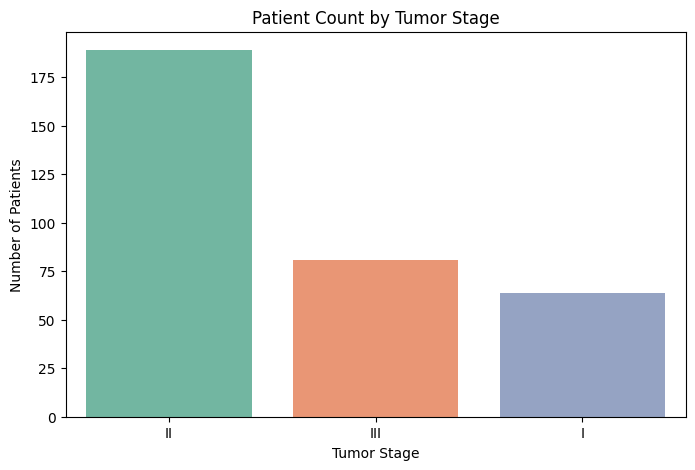

Test passed: Patient count by tumor stage plotted successfully.


In [249]:
# Visualization 1

def plot_patient_count_by_tumor_stage(df):

    """
    Plots a bar chart showing the number of patients in each tumor stage.
    """

    try:

        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x='Tumour_Stage', palette='Set2', order=df['Tumour_Stage'].value_counts().index)
        plt.title('Patient Count by Tumor Stage')
        plt.xlabel('Tumor Stage')
        plt.ylabel('Number of Patients')
        plt.show()

        print("Test passed: Patient count by tumor stage plotted successfully.")

    except Exception as e:
        print(f"Test failed: {e}")

plot_patient_count_by_tumor_stage(final_merged_df)

The bar chart illustrates the distribution of patients across different tumor stages (I, II, and III). The largest group of patients belongs to Tumor Stage II, indicating that a significant portion of patients are diagnosed in a moderately advanced stage of cancer. This suggests that most patients in the dataset might be seeking medical attention during this intermediate stage, possibly due to the progression of symptoms or detection through regular screenings.

The number of patients decreases significantly for Tumor Stage III, highlighting that fewer individuals are diagnosed in the more advanced stage. This could indicate a decline in the survivability or detectability of the disease at this point or possibly better early-stage detection strategies.

Interestingly, Tumor Stage I has the lowest number of patients, suggesting a potential lack of early detection in the dataset population. This might imply that early cancer screenings or awareness programs could be improved to ensure earlier diagnoses, where the prognosis tends to be better.

This visualization emphasizes the importance of early detection and the potential role of regular screenings in improving diagnosis rates at earlier tumor stages, thereby enhancing treatment outcomes.

**Data Visualization 2**

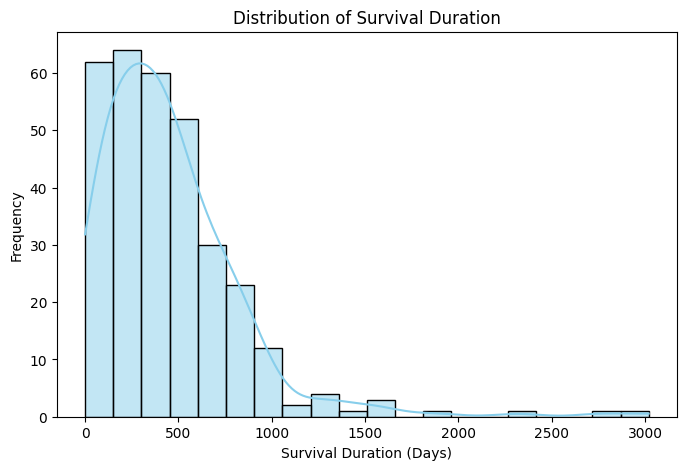

Test passed: Survival duration distribution plotted successfully.


In [250]:
# Visualization 2

def plot_survival_duration_distribution(df):

    """
    Plots a histogram showing the distribution of survival duration in days.
    """

    try:

        plt.figure(figsize=(8, 5))
        sns.histplot(df['Survival_Duration'].dropna(), bins=20, kde=True, color='skyblue')
        plt.title('Distribution of Survival Duration')
        plt.xlabel('Survival Duration (Days)')
        plt.ylabel('Frequency')
        plt.show()

        print("Test passed: Survival duration distribution plotted successfully.")

    except Exception as e:
        print(f"Test failed: {e}")

plot_survival_duration_distribution(final_merged_df)

The histogram displays the distribution of survival durations (in days) for cancer patients in the dataset. The majority of patients have survival durations concentrated between 0 and 1000 days, with a noticeable peak around the 300 to 500 days range, indicating that most patients survive for less than 3 years following their initial surgery or treatment.

The distribution is right-skewed, with a long tail extending towards higher survival durations, suggesting that a smaller number of patients achieve extended survival periods (beyond 1500 days or approximately 4 years). However, these long-term survivors represent an exceptional group with potentially better prognoses, treatment responses, or less aggressive cancer types.

The declining frequency as survival duration increases underscores the progressive nature of the disease, where long-term survival becomes less common. The sharp drop in frequencies beyond 1000 days highlights a critical survival period, suggesting that most patients face significant challenges after the 3-year mark.

The peak around 300–500 days likely represents the typical survival window for most patients, suggesting the need for focused care during this period.
The smaller group with longer survival durations might benefit from further study to identify factors contributing to their outcomes, such as treatment effectiveness, tumor stage at diagnosis, or other demographic characteristics.

**Data Visualization 3**

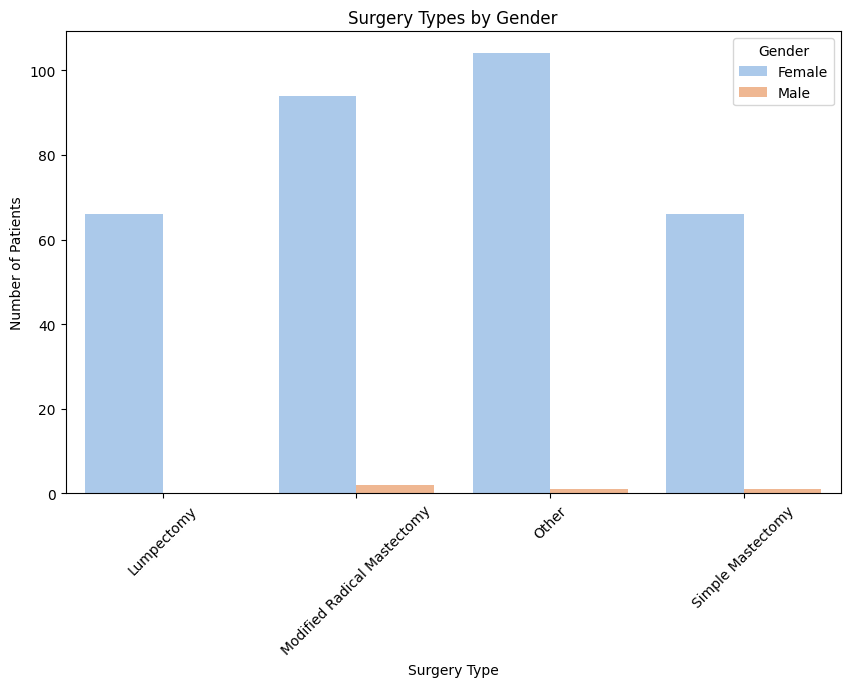

Test passed: Surgery type by gender plotted successfully.


In [251]:
# Visualization 3

def plot_surgery_type_by_gender(df):

    """
    Plots a grouped bar chart showing the count of each surgery type by gender.
    """

    try:

        plt.figure(figsize=(10, 6))
        surgery_gender_counts = df.groupby(['Gender', 'Surgery_type']).size().reset_index(name='Count')
        sns.barplot(data=surgery_gender_counts, x='Surgery_type', y='Count', hue='Gender', palette='pastel')
        plt.title('Surgery Types by Gender')
        plt.xlabel('Surgery Type')
        plt.ylabel('Number of Patients')
        plt.xticks(rotation=45)
        plt.legend(title='Gender')
        plt.show()

        print("Test passed: Surgery type by gender plotted successfully.")

    except Exception as e:
        print(f"Test failed: {e}")

plot_surgery_type_by_gender(final_merged_df)

The grouped bar chart shows the distribution of surgery types performed on cancer patients, categorized by gender. It is evident from the chart that the majority of surgeries are performed on female patients, which aligns with the dataset's likely focus on breast cancer, a condition that predominantly affects women. Female patients account for nearly all the surgeries across all types, including lumpectomy, modified radical mastectomy, simple mastectomy, and surgeries classified as other. This reflects the expected gender distribution in a dataset primarily related to breast cancer.

Male patients, on the other hand, have very minimal representation in the dataset, with only a small number of surgeries performed. These are mostly in the modified radical mastectomy category, with negligible representation in other surgery types. This aligns with the relatively low incidence of breast cancer in men compared to women, making male patients an underrepresented group in this dataset.

Among the surgery types, the "Other" category is the most frequently performed, followed by modified radical mastectomy and simple mastectomy. Lumpectomy is the least common surgery type. This distribution suggests that more invasive procedures like mastectomies are commonly performed, which may indicate a focus on treating advanced-stage cancer or adopting aggressive treatment strategies.

This chart highlights the predominance of female patients in breast cancer treatment and underscores the need to explore gender-based differences in diagnosis, treatment, and outcomes. Additionally, it provides insight into the relative frequencies of different surgery types, which could be further analyzed for their effectiveness and impact on survival outcomes.

**Data Visualization 4**

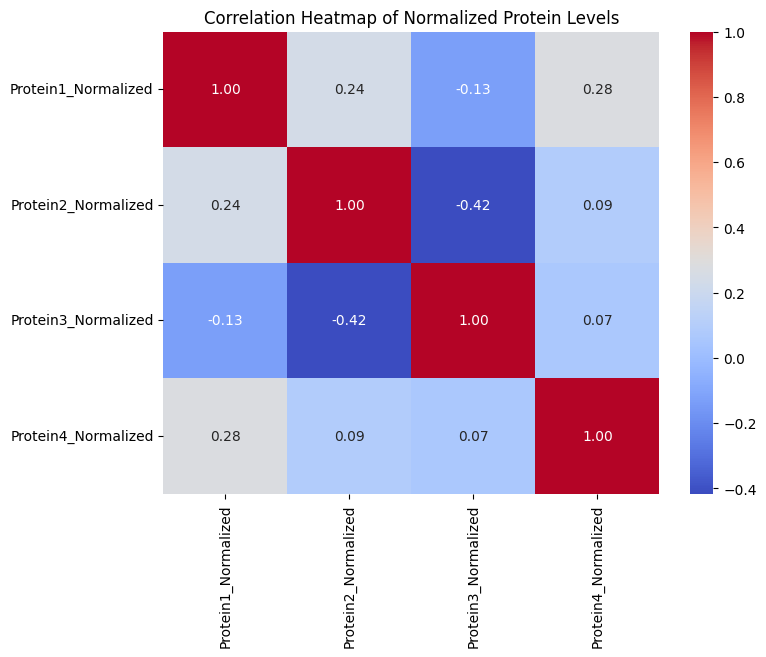

Test passed: Protein correlation heatmap plotted successfully.


In [252]:
# Visualization 4

def plot_protein_correlation_heatmap(df):

    """
    Plots a heatmap showing the correlations between normalized protein levels.
    """

    try:

        protein_cols = ['Protein1_Normalized', 'Protein2_Normalized', 'Protein3_Normalized', 'Protein4_Normalized']
        plt.figure(figsize=(8, 6))
        sns.heatmap(df[protein_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Heatmap of Normalized Protein Levels')
        plt.show()

        print("Test passed: Protein correlation heatmap plotted successfully.")

    except Exception as e:
        print(f"Test failed: {e}")

plot_protein_correlation_heatmap(final_merged_df)

The heatmap above represents the correlation matrix for the normalized protein levels (Protein1_Normalized, Protein2_Normalized, Protein3_Normalized, and Protein4_Normalized). Correlation values range between -1 (perfect negative correlation) and 1 (perfect positive correlation), while values closer to 0 indicate weak or no correlation. This visualization helps us understand the relationships between the protein levels and their potential interplay in cancer-related processes.

The correlations between the proteins are generally low to moderate, indicating that these protein levels are not highly interdependent. For instance, Protein1_Normalized shows weak positive correlations with both Protein2_Normalized (0.24) and Protein4_Normalized (0.28), suggesting slight co-expression or similar patterns under certain conditions. On the other hand, Protein2_Normalized and Protein3_Normalized exhibit a negative correlation (-0.42), indicating an inverse relationship, where higher levels of one protein correspond to lower levels of the other.

Interestingly, the correlations involving Protein3_Normalized are weak overall, ranging from -0.42 to 0.07, suggesting that this protein might function more independently compared to the others. Meanwhile, the diagonal values (all 1.00) confirm perfect self-correlation, as expected.

The weak correlations among most of the proteins suggest that each protein might play a distinct and independent role in cancer progression, diagnosis, or treatment response. The negative correlation between Protein2 and Protein3 could indicate opposing biological functions or responses under specific conditions, warranting further investigation through experimental or clinical studies. The heatmap highlights the need to independently analyze these proteins' contributions to clinical outcomes such as tumor progression, treatment success, or patient survival. This visualization provides valuable direction for exploring how these proteins may function either individually or collectively in cancer biology.

# Conclusion

This project provided a detailed analysis of cancer-related data by merging and visualizing information about protein levels, tumor stages, treatment details, and patient demographics. Through transformations, aggregations, and visualizations, key insights were derived regarding the relationships between these variables and their potential implications for cancer diagnosis and treatment.

The analysis of tumor stages revealed that most patients are diagnosed at Tumor Stage II, highlighting the importance of early detection to potentially shift diagnoses to earlier stages for better prognoses. The distribution of survival durations emphasized that the majority of patients survive for less than three years post-treatment, with only a small subset achieving long-term survival, which could inform future research into the factors contributing to these outcomes.

The exploration of surgery types by gender demonstrated that the dataset predominantly focuses on female patients, reflecting the high incidence of breast cancer among women. It also showcased the prevalence of more invasive procedures such as mastectomies, pointing toward the need for targeted strategies to reduce the burden of advanced-stage cancer.

The protein correlation heatmap revealed generally weak correlations among the normalized protein levels, suggesting that these proteins may function independently. However, the inverse relationship between Protein2 and Protein3 invites further investigation to understand their potentially opposing roles in cancer biology.

Overall, this project highlights the importance of data-driven approaches to understanding cancer-related factors, enabling better diagnosis, personalized treatment strategies, and improved patient outcomes.